# Линейная регрессия с помощью scikit-learn

## Содержание

1. Регрессия с одним параметром на boston.csv  
2. Регрессия со всеми параметрами на boston.csv

## 1. Регрессия с одним параметром на boston.csv 

### Предобработка данных

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [22]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [23]:
DATA_DIR = "data" # путь к данным

In [24]:
df_boston = pd.read_csv(os.path.join(DATA_DIR, 'boston.csv'), index_col='ID') # прочитать данные из CSV и указать колонку с индексом
df_boston = df_boston.sample(frac=1, random_state=42) # перемешиваем данные на всякий случай
df_boston = df_boston.reset_index(drop=True) # сбросить индексы для красоты

print("df_boston.shape: {}".format(df_boston.shape))
df_boston.head()

df_boston.shape: (333, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
1,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87,19.6
2,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27,19.8
3,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70,27.9
4,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62,23.9


In [25]:
TRAIN_TEST_RATIO = 0.8 # доля экземпляров в тренировочном датасете по отношению к количеству всех экземпляров в исходном датасете

In [26]:
train_number = round(df_boston.shape[0] * TRAIN_TEST_RATIO) # количество экземпляров в тренировочном датасете

X_train = df_boston['lstat'].iloc[:train_number].values.reshape(-1, 1) # избегание ошибки с одномерным массивом
y_train = df_boston['medv'].iloc[:train_number].values

X_test = df_boston['lstat'].iloc[train_number:].values.reshape(-1, 1) # избегание ошибки с одномерным массивом
y_test = df_boston['medv'].iloc[train_number:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (266, 1)
y_train.shape: (266,)
X_test.shape: (67, 1)
y_test.shape: (67,)


### Визуализация данных

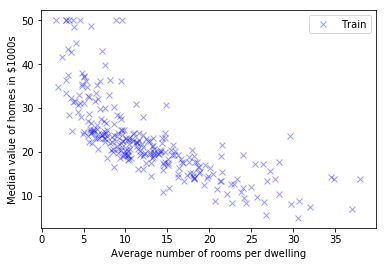

In [27]:
plt.plot(X_train, y_train, 'bx', label="Train", alpha=0.4) # тренировочные данные крестиками
plt.xlabel("Average number of rooms per dwelling") # надпись по оси X
plt.ylabel("Median value of homes in $1000s") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

### Создание и тренировка модели

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression() # создание модели
model.fit(X_train, y_train) # обучение

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Оценка модели

In [30]:
print("Train R^2 score: {}".format(model.score(X_train, y_train)))
print("Test R^2 score: {}".format(model.score(X_test, y_test)))

Train R^2 score: 0.5388854708983479
Test R^2 score: 0.5612724845300093


### Визуализация работы модели

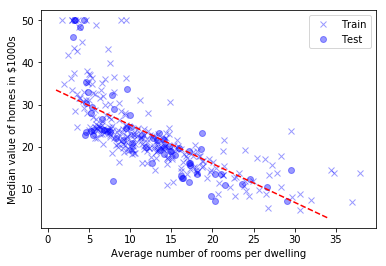

In [32]:
plt.plot(X_train, y_train, 'bx', label='Train', alpha=0.4) # тренировочные данные крестиками
plt.plot(X_test, y_test, 'bo', label='Test', alpha=0.4) # тестовые данные кружочками

# параметр model.coef_ - веса модели (W)
# параметр model.intercept_ - свободный параметр модели (b)
xx = np.arange(1, 35).reshape(-1, 1) # числовой ряд
plt.plot(xx, model.coef_ * xx + model.intercept_, 'r--') # график предсказаний модели
plt.xlabel("Average number of rooms per dwelling") # надпись по оси X
plt.ylabel("Median value of homes in $1000s") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

## 2. Регрессия со всеми параметрами на boston.csv

### Предобработка данных

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [13]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [14]:
DATA_DIR = "data" # путь к данным

In [15]:
df_boston = pd.read_csv(os.path.join(DATA_DIR, 'boston.csv'), index_col='ID') # прочитать данные из CSV и указать колонку с индексом
df_boston = df_boston.sample(frac=1, random_state=42) # перемешиваем данные на всякий случай
df_boston = df_boston.reset_index(drop=True) # сбросить индексы для красоты

print("df_boston.shape: {}".format(df_boston.shape))
df_boston.head()

df_boston.shape: (333, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
1,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87,19.6
2,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27,19.8
3,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70,27.9
4,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62,23.9


In [16]:
TRAIN_TEST_RATIO = 0.8 # доля экземпляров в тренировочном датасете по отношению к количеству всех экземпляров в исходном датасете

In [17]:
train_number = round(df_boston.shape[0] * TRAIN_TEST_RATIO) # количество экземпляров в тренировочном датасете

X_train = df_boston.drop(['medv'], axis=1).iloc[:train_number].values
y_train = df_boston['medv'].iloc[:train_number].values

X_test = df_boston.drop(['medv'], axis=1).iloc[train_number:].values
y_test = df_boston['medv'].iloc[train_number:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (266, 13)
y_train.shape: (266,)
X_test.shape: (67, 13)
y_test.shape: (67,)


### Создание и тренировка модели

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression() # создание модели
model.fit(X_train, y_train) # обучение

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Оценка модели

In [20]:
print("Train R^2 score: {}".format(model.score(X_train, y_train)))
print("Test R^2 score: {}".format(model.score(X_test, y_test)))

Train R^2 score: 0.7412497216458146
Test R^2 score: 0.6982979236200475
